In [70]:
import os
os.chdir("./")

from scipy.signal import argrelextrema
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta 
import matplotlib.pyplot as plt
import yfinance as yf
import talib
from IPython.display import display,Image

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz

from pydotplus import graph_from_dot_data

In [71]:
stock_data_list = pd.read_excel("C:/Users/Administrator/documents/Python Scripts/data/hk_main_board_cleaned_list.xlsx"); 
stock_ids_arr   = ' '.join(stock_data_list["Stock ID"]);
stock_ids_list  = stock_data_list["Stock ID"].tolist();

# C:/Users/Gary Chu/Documents/Python Scripts_v2/data/hk_main_board_cleaned_list.xlsx
# C:\Users\Administrator\Documents\Python Scripts\data\hk_main_board_cleaned_list.xlsx

In [72]:
input_start_date = "2010-01-01";
input_end_date   = "2017-01-01";

In [73]:
def getOnlineData_func(start_date,end_date, list_stocks = ""):
    fetch_df = yf.download(list_stocks,start_date,end_date);
    fetch_df = fetch_df[["Open","High","Low","Close","Volume"]];
    return fetch_df;

raw_df = getOnlineData_func(input_start_date,input_end_date, stock_ids_arr);

[*********************100%***********************]  679 of 679 completed

180 Failed downloads:
- 2337.HK: Data doesn't exist for startDate = 1262275200, endDate = 1483200000
- 1797.HK: Data doesn't exist for startDate = 1262275200, endDate = 1483200000
- 9928.HK: Data doesn't exist for startDate = 1262275200, endDate = 1483200000
- 1516.HK: Data doesn't exist for startDate = 1262275200, endDate = 1483200000
- 8606.HK: Data doesn't exist for startDate = 1262275200, endDate = 1483200000
- 1763.HK: Data doesn't exist for startDate = 1262275200, endDate = 1483200000
- 6199.HK: Data doesn't exist for startDate = 1262275200, endDate = 1483200000
- 6996.HK: Data doesn't exist for startDate = 1262275200, endDate = 1483200000
- 2181.HK: Data doesn't exist for startDate = 1262275200, endDate = 1483200000
- 6855.HK: Data doesn't exist for startDate = 1262275200, endDate = 1483200000
- 2269.HK: Data doesn't exist for startDate = 1262275200, endDate = 1483200000
- 0667.HK: Data doesn't exist for s

In [74]:
raw_df

Open                                                        \
              0001.HK    0002.HK   0003.HK    0004.HK    0005.HK    0006.HK   
Date                                                                          
2010-01-04  71.614799  52.500000  6.819133  13.672063  89.400002  42.250000   
2010-01-05  72.400902  52.650002  6.889072  14.359485  90.199997  43.000000   
2010-01-06  73.401604  52.849998  6.889072  14.573350  91.300003  43.200001   
2010-01-07  72.543900  52.900002  6.924042  14.283105  91.699997  42.950001   
2010-01-08  72.186501  52.750000  6.882078  13.840099  91.500000  43.000000   
...               ...        ...       ...        ...        ...        ...   
2016-12-22  88.849998  72.400002  9.376953  16.100000  63.099998  69.000000   
2016-12-23  88.000000  71.500000  9.267919  16.068493  62.099998  68.000000   
2016-12-28  88.500000  71.199997  9.254290  15.816438  61.799999  68.000000   
2016-12-29  88.000000  71.199997  9.227031  15.721918  61.299999  67.599998   
2016-12-30  87.000000  70.900002  9.267919  16.005480  61.750000  67.800003   

                                                        ...  Volume          \
             0008.HK    0010.HK     0011.HK    0012.HK  ... 9988.HK 9989.HK   
Date                                                    ...                   
2010-01-04  1.880000  38.650002  114.800003  29.994101  ...     NaN     NaN   
2010-01-05  1.920003  39.849998  115.400002  30.532900  ...     NaN     NaN   
2010-01-06  1.959996  40.950001  114.500000  30.686899  ...     NaN     NaN   
2010-01-07  1.980003  41.150002  115.000000  30.276300  ...     NaN     NaN   
2010-01-08  1.970000  40.500000  114.599998  29.403999  ...     NaN     NaN   
...              ...        ...         ...        ...  ...     ...     ...   
2016-12-22  4.240000  27.900000  146.500000  30.653601  ...     NaN     NaN   
2016-12-23  4.270000  27.100000  145.399994  30.540899  ...     NaN     NaN   
2016-12-28  4.230000  27.299999  143.199997  30.428200  ...     NaN     NaN   
2016-12-29  4.150000  26.500000  142.100006  30.240400  ...     NaN     NaN   
2016-12-30  4.180000  26.400000  143.899994  30.728800  ...     NaN     NaN   

                                                                            
           9990.HK 9991.HK 9992.HK 9993.HK 9995.HK 9996.HK 9997.HK 9999.HK  
Date                                                                        
2010-01-04     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2010-01-05     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2010-01-06     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2010-01-07     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2010-01-08     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
...            ...     ...     ...     ...     ...     ...     ...     ...  
2016-12-22     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2016-12-23     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2016-12-28     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2016-12-29     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2016-12-30     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1725 rows x 3395 columns]

average_vol_1_month: 4647063.368421053
check_vol_max_5_days: 21014469.0
check_vol_greater: 4.522096501373975
check_max_vol_price_greater: 0.00756017940560567
breakout:yes


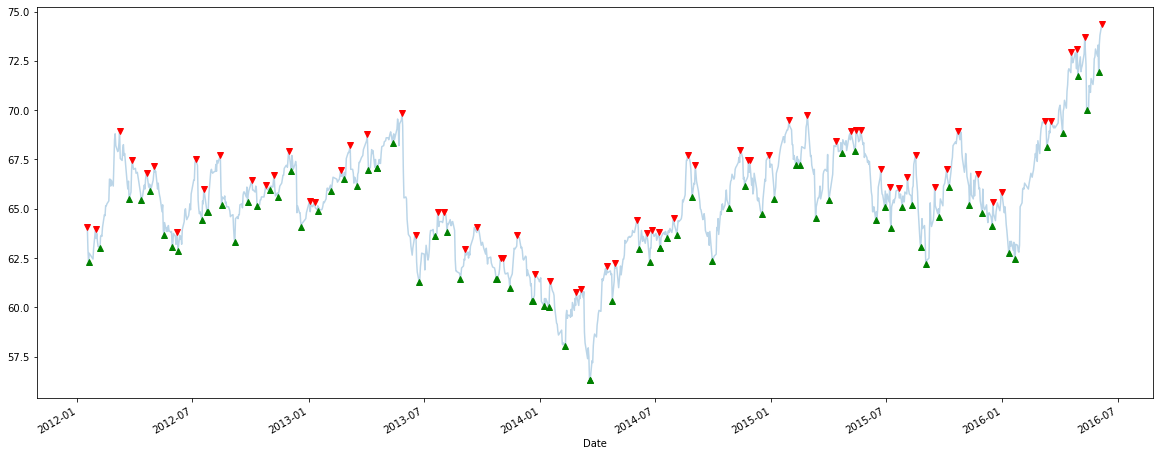

In [93]:
def check_break_out(stock,date_start,date_end):
    
    check_vol_break_pd = raw_df["Volume"][stock].loc[date_start:date_end]
    average_vol_1_month = check_vol_break_pd.iloc[-20:-1].mean()
    check_vol_5_days1 = check_vol_break_pd[-6:]
    check_vol_5_days = pd.DataFrame({"ID":range(len(check_vol_5_days1)),"Volume":check_vol_5_days1})
#     check_vol_5_days_df =  pd.DataFrame({"ID":range(len(check_vol_5_days)),check_vol_5_days})
    check_vol_max_5_days = check_vol_break_pd[-6:].max()
    check_vol_max_date = check_vol_5_days1[check_vol_5_days1==check_vol_max_5_days].index
    check_vol_max_date_ID = int(check_vol_5_days.loc[check_vol_max_date]['ID']-1)
    check_vol_max_previous_date = check_vol_5_days[check_vol_5_days['ID'] == check_vol_max_date_ID].index
    
#     print(check_vol_max_date)
#     print(check_vol_5_days)
#     print(check_vol_max_date_ID)
    
    check_break_out_pd = raw_df["Close"][stock].loc[date_start:date_end]
    local_min_idx = argrelextrema(check_break_out_pd.values, np.less_equal, order=5)[0]
    local_max_idx = argrelextrema(check_break_out_pd.values, np.greater_equal, order=5)[0]
    
    local_min_price = check_break_out_pd.iloc[local_min_idx]
    local_max_price = check_break_out_pd.iloc[local_max_idx]
    
    latest_price = check_break_out_pd[-1]
    latest_vol = check_vol_break_pd[-1]
    check_vol_greater_ratio = (check_vol_max_5_days/average_vol_1_month)
    check_max_vol_price_greater = (float(check_break_out_pd.loc[check_vol_max_date]) - float(check_break_out_pd.loc[check_vol_max_previous_date]))/float(check_break_out_pd.loc[check_vol_max_previous_date])
#     print("price_1:",float(check_break_out_pd.loc[check_vol_max_date]))
#     print("price_2:",check_break_out_pd.loc[check_vol_max_previous_date])
#     print("price_3:",check_break_out_pd)
    print("average_vol_1_month:",average_vol_1_month)
    print("check_vol_max_5_days:",check_vol_max_5_days)
    print("check_vol_greater:",check_vol_greater_ratio)
    print("check_max_vol_price_greater:",check_max_vol_price_greater)

    
    if latest_price>=local_max_price[-1] and local_max_price[-1]>=local_max_price[-2] and local_min_price[-1]>=local_min_price[-2]:
            print("breakout:yes")
    else:
            print("breakout:no")

    check_break_out_pd.plot(figsize=(20,8), alpha=.3)
    check_break_out_pd.iloc[local_max_idx].plot(style='.', lw=10, color='red', marker="v");
    check_break_out_pd.iloc[local_min_idx].plot(style='.', lw=10, color='green', marker="^");
    
check_break_out("0002.HK","2012-01-17","2016-06-06")